In [1]:
# %pip install pandas
# %pip install numpy
# %pip install sklearn
# %pip install matplotlib
# %pip install pyswarms

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
import pyswarms as ps
from utils import GPR, mean_squared_error

In [3]:

np.random.seed(42)
target_func = lambda X: (20 + X**2 - 10 * np.cos(2*np.pi*X)).sum(axis=0)

def generate_sample(n, n_dims, lower, upper, target_func, noise_scale=0):
    """
    Generates data sample 1.
    """
    X = np.random.rand(n_dims, n)
    for i in range(n_dims):
        X[i] = X[i]*(upper[i]-lower[i]) + lower[i]
    y = target_func(X)
    y += np.random.normal(0, noise_scale, size=y.shape)
    
    return (X,y)

In [4]:
N = 500
X_train, y_train = generate_sample(N, 2, (-2.5, -1.5), (1.5, 2.5), target_func, noise_scale=1)

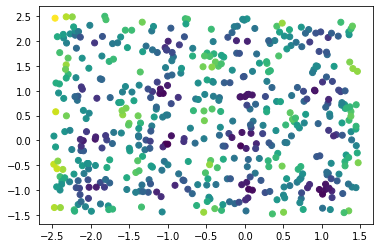

In [5]:
plt.scatter(X_train[0], X_train[1], c=y_train)
plt.show()

In [6]:
X_test, y_test = generate_sample(50_000, 2, (-2.5, -1.5), (1.5, 2.5), target_func)

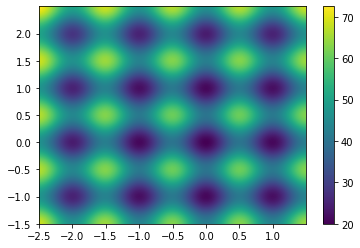

In [7]:
m = np.arange(-2.5,1.5,0.001)
p = np.arange(-1.5,2.5,0.001)

X = np.array(np.meshgrid(m, p))
Z = target_func(X)

plt.pcolormesh(m,p,Z)
plt.colorbar()
plt.show()

In [8]:
hp = {
    'c1': 0.5, 
    'c2': 0.3, 
    'w': 0.9,
    'n_optim_steps': 10,
    'n_particles': 10,
    'n_restarts_optimizer': 10
}

gpr = GPR(**hp)

In [9]:
gpr.fit(X_train, y_train)

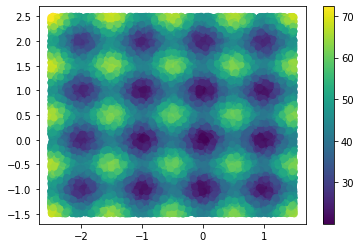

In [10]:
y_pred = gpr.predict(X_test)
plt.scatter(X_test[0, :], X_test[1, :], c=y_test)
plt.colorbar()
plt.show()

In [11]:
mean_squared_error(y_test, y_pred)

1.2266853267859388